# Predicting Teacher Turnover

__Meaghan Ross__

Flatiron School Capstone

![teacher-turnover](images/teacher-retention-illustration.jpeg)

### Business Understanding

Teacher turnover has been identified as one of the key factors contributing to teacher shortages, which have been growing since 2015. According to the [Learning Policy Institute](https://learningpolicyinstitute.org/product/teacher-turnover-brief), about 8% of teachers leave the profession each year, two-thirds of them for reasons other than retirement and another 8% shift to different schools each year. Additionally, beginning teachers have the highest turnover rates and somewhere between 40-50% of those that go into teaching are gone within five years.

High turnover rates have been found to lower student achievement and are costly for schools. The revolving door of teacher turnover costs school districts upwards of $2.2 billion a year nationally. In 2019, The [Philadelphia Inquirer](https://www.inquirer.com/news/philadephia-district-schools-teacher-turnover-solutions-20190503.html) found that there were 26 schools in the 217 School District of Philadelphia public schools that have lost at least 25 percent of their teachers for four years straight or lost more than one-third in each of the last two school years. Richard Ingersoll, a University of Pennsylvania professor and expert in school staffing, called these findings “appalling.”

The goal of this project is to create a classification model for the School District of Philadelphia that predicts which teachers will leave their current school of employment at the end of a school year. This model will allow district administrators to provide intervention in attempts to retain those teachers who are identified as leaving, or to notify school administrators to prepare earlier to hire quality teachers to fill vacancies. 

### Data Understanding

For this project, publicly available data was gathered from the School District of Philadelphia. 

Research on teacher turnover has shown that occupational factors and student demographic factors influence turnover, so both types of features were incorporated to the final data frame. 

The many datasets were:
* [Employee Information](https://www.philasd.org/performance/programsservices/open-data/district-information/#employee_data): This data included the occupational factors for individual teachers including gender, salary, and their title description.
* [School Progress Reports](https://www.philasd.org/performance/programsservices/school-progress-reports/spr-helpful-resources/): This data includes school ratings in the areas of achievement, progress, and climate.
* [Student Enrollment & Demographic Information](https://www.philasd.org/performance/programsservices/open-data/school-information/#school_enrollment): This data includes student demographic factors which includes the rates of economically disadvantaged, ELL (English Language Learners), IEP (Special Education), and ethincity by school.

The final dataset that resulted from merging the occupational factors with student demographic factors contained approximately 8,000 records representing teachers in the School District of Philadelphia from the 2017-2018 school year. Those teachers were identified as either returning to their current placement or having turned over using employee information from the 2018-2019 school year. The preparation of the final dataset can be viewed in the [Data Preparation Notebook](./Data_Prep.ipynb).

### Import Dependencies and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,\
plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate

In [2]:
ls data/

2017-2018 Enrollment & Demographics.xlsx
SPR_SY1415_School_Metric_Scores_20160208.xlsx
SPR_SY1516_School_Metric_Scores_20170203.xlsx
SPR_SY1617_School_Metric_Scores_20180206.xlsx
SPR_SY1718_School_Metric_Scores_20190129.xlsx
SPR_SY1819_School_Metric_Scores_20200127.xlsx
df_2019.csv
employee_information_April2015.csv
employee_information_April2016.csv
employee_information_April2017.csv
employee_information_April2018.csv
employee_information_April2019.csv
employee_information_April2020.csv
employee_information_April2021.csv
full_data.csv


In [3]:
df = pd.read_csv('data/df_2019.csv', index_col=0)

In [4]:
df.head()

,LAST_NAME,FIRST_NAME,PAY_RATE,TITLE_DESCRIPTION,HOME_ORGANIZATION,ORGANIZATION_LEVEL,GENDER,School,Zip Code,Turnaround Model,...,Percent IEP,Percent Male,Percent Asian,Percent Black/African American,Percent Hispanic,Percent Multi-Race,Percent White,Economically Disadvantaged Rate,NEW_TEACHER,TURNOVER
0,ABAYOMI-IGE,OLABIMPE,90051,"TEACHER,SPEC EDUCATION",5070.0,HIGH SCHOOL,F,Parkway Northwest High School,19138.0,None,...,0.103846,0.488462,0.000000,0.934615,0.046154,0.007692,0.011538,0.824615,0,0
1,ABBOTT,JOYCE,76461,"TEACHER,FULL TIME",1290.0,ELEMENTARY SCHOOL,F,Andrew Hamilton School,19139.0,None,...,0.194757,0.558052,0.001873,0.893258,0.014981,0.069288,0.014981,1.000000,0,0
2,ABDUL-LATEEF,VILLIA,56531,"TEACHER,FULL TIME",1010.0,HIGH SCHOOL,F,John Bartram High School,19142.0,None,...,0.293805,0.576991,0.033628,0.915044,0.030088,0.015929,0.003540,1.000000,0,1
3,ABDULALEEM,MUHAMMAD,70564,"TEACHER,FULL TIME",6090.0,CAREER AND TECHNICAL HIGH SCHL,M,A. Philip Randolph Career and Technical High S...,19129.0,None,...,0.187879,0.634343,0.002020,0.905051,0.016162,0.040404,0.026263,1.000000,0,0
4,ABDULLAH,AARON,46694,"TEACHER,FULL TIME",6360.0,ELEMENTARY SCHOOL,M,Theodore Roosevelt School,19144.0,Turnaround,...,0.178161,0.522989,0.001916,0.919540,0.040230,0.028736,0.009579,1.000000,1,0


## EDA

In [5]:
df.head()

,LAST_NAME,FIRST_NAME,PAY_RATE,TITLE_DESCRIPTION,HOME_ORGANIZATION,ORGANIZATION_LEVEL,GENDER,School,Zip Code,Turnaround Model,...,Percent IEP,Percent Male,Percent Asian,Percent Black/African American,Percent Hispanic,Percent Multi-Race,Percent White,Economically Disadvantaged Rate,NEW_TEACHER,TURNOVER
0,ABAYOMI-IGE,OLABIMPE,90051,"TEACHER,SPEC EDUCATION",5070.0,HIGH SCHOOL,F,Parkway Northwest High School,19138.0,None,...,0.103846,0.488462,0.000000,0.934615,0.046154,0.007692,0.011538,0.824615,0,0
1,ABBOTT,JOYCE,76461,"TEACHER,FULL TIME",1290.0,ELEMENTARY SCHOOL,F,Andrew Hamilton School,19139.0,None,...,0.194757,0.558052,0.001873,0.893258,0.014981,0.069288,0.014981,1.000000,0,0
2,ABDUL-LATEEF,VILLIA,56531,"TEACHER,FULL TIME",1010.0,HIGH SCHOOL,F,John Bartram High School,19142.0,None,...,0.293805,0.576991,0.033628,0.915044,0.030088,0.015929,0.003540,1.000000,0,1
3,ABDULALEEM,MUHAMMAD,70564,"TEACHER,FULL TIME",6090.0,CAREER AND TECHNICAL HIGH SCHL,M,A. Philip Randolph Career and Technical High S...,19129.0,None,...,0.187879,0.634343,0.002020,0.905051,0.016162,0.040404,0.026263,1.000000,0,0
4,ABDULLAH,AARON,46694,"TEACHER,FULL TIME",6360.0,ELEMENTARY SCHOOL,M,Theodore Roosevelt School,19144.0,Turnaround,...,0.178161,0.522989,0.001916,0.919540,0.040230,0.028736,0.009579,1.000000,1,0


There are some coulumns that are currently listed as objects that should be numerical so to do proper EDA we should transform those in order to explore relationships.

In [6]:
df_eda = df.copy()

In [7]:
obj_to_num = ['Student Survey Climate Score', 'Student Survey Teaching Score', 
                  'Overall Score', 'Ach Score', 'Prog Score']

In [11]:
for col in obj_to_num:
    df_eda.loc[(df_eda[col] == 'Not Applicable'), col] = 0
    df_eda.loc[(df_eda[col] == 'Insufficient Data'), col] = 0

In [12]:
for col in obj_to_num:
    df_eda[col] = df_eda[col].astype('float64')
for col in [df_eda.select_dtypes('int64').columns]:
    df_eda[col] = df_eda[col].astype('float64')

In [14]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7927 entries, 0 to 8251
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LAST_NAME                          7927 non-null   object 
 1   FIRST_NAME                         7927 non-null   object 
 2   PAY_RATE                           7927 non-null   float64
 3   TITLE_DESCRIPTION                  7927 non-null   object 
 4   HOME_ORGANIZATION                  7927 non-null   float64
 5   ORGANIZATION_LEVEL                 7927 non-null   object 
 6   GENDER                             7927 non-null   object 
 7   School                             7927 non-null   object 
 8   Zip Code                           7927 non-null   float64
 9   Turnaround Model                   7927 non-null   object 
 10  Enrollment                         7927 non-null   float64
 11  Admissions Type                    7927 non-null   objec

__What is the distribution of teacher turnover following the 2017-2018 school year?__

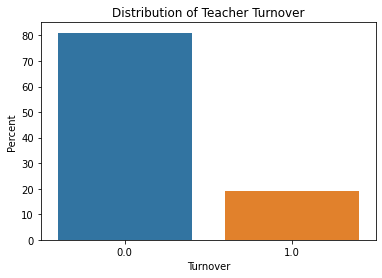

In [15]:
ax = sns.barplot(x='TURNOVER', 
                 y='TURNOVER', 
                 data=df_eda, 
                 estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent", 
       xlabel="Turnover", 
       title = "Distribution of Teacher Turnover");

__What is the relationship between new to teaching and turnover?__

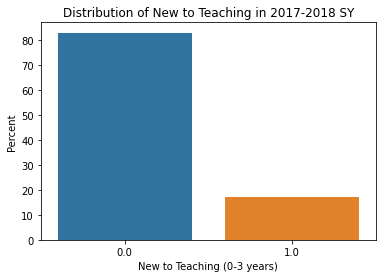

In [16]:
ax = sns.barplot(x='NEW_TEACHER', 
                 y='NEW_TEACHER', 
                 data=df_eda, 
                 estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent", 
       xlabel="New to Teaching (0-3 years)", 
       title = "Distribution of New to Teaching in 2017-2018 SY");

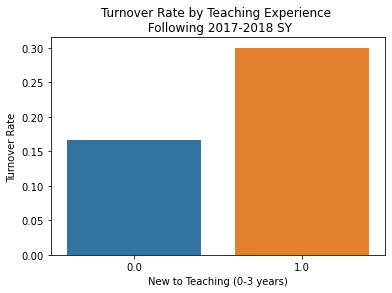

In [17]:
ax = sns.barplot(x='NEW_TEACHER', 
                 y="TURNOVER", 
                 data=df_eda,
                 ci=None)
ax.set(ylabel="Turnover Rate", 
       xlabel="New to Teaching (0-3 years)", 
       title = "Turnover Rate by Teaching Experience \n Following 2017-2018 SY");

__What is the relationship between type of teacher (General Education vs Special Education) and teacher turnover?__

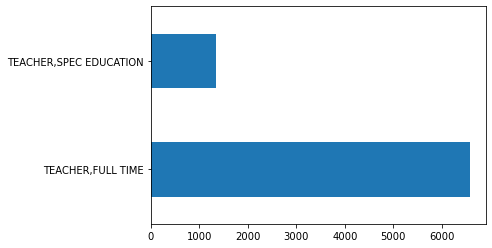

In [19]:
df_eda['TITLE_DESCRIPTION'].value_counts().plot.barh();

__What is the realtionship between Gender and Teacher Turnover?__

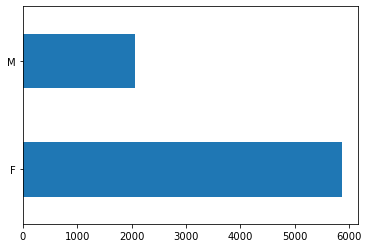

In [20]:
df_eda['GENDER'].value_counts().plot.barh();

__What is the relationship between salary and teacher turnover?__

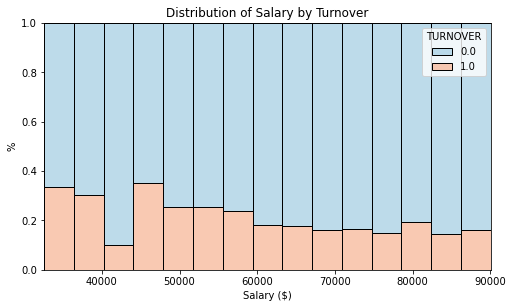

In [21]:
f = plt.figure(figsize=(8,10))
ax = f.add_subplot(2,1,1)

sns.histplot(data=df_eda, ax=ax, stat='probability', multiple="fill",
             x="PAY_RATE", palette = 'RdBu_r',
             hue="TURNOVER", element="bars", 
             legend=True, bins=15)
ax.set_title("Distribution of Salary by Turnover")
ax.set_xlabel("Salary ($)")
ax.set_ylabel("%");

__What is the distribution of economically disadvantaged students in relation to teacher turnover?__

In [23]:
df_eda.corr()

,PAY_RATE,HOME_ORGANIZATION,Zip Code,Enrollment,Overall Score,Ach Score,Prog Score,Clim Score,Attendance (95%+) Score,Retention Score,...,Percent IEP,Percent Male,Percent Asian,Percent Black/African American,Percent Hispanic,Percent Multi-Race,Percent White,Economically Disadvantaged Rate,NEW_TEACHER,TURNOVER
PAY_RATE,1.000000,0.038187,-0.006289,0.084483,0.081015,0.114272,-0.001125,0.124878,0.101647,0.100311,...,-0.049168,-0.028847,0.115173,-0.105985,-0.018540,0.072683,0.124008,-0.088749,-0.716830,-0.128383
HOME_ORGANIZATION,0.038187,1.000000,-0.173860,0.420716,0.087136,0.032721,0.032713,0.161885,0.042418,0.180387,...,-0.134362,0.047961,0.022180,-0.379480,0.271753,0.279922,0.269318,0.003295,-0.021044,-0.040983
Zip Code,-0.006289,-0.173860,1.000000,-0.170351,-0.076863,-0.078634,-0.029728,-0.123098,-0.033053,-0.118810,...,-0.004095,-0.130155,0.019649,0.059872,-0.019510,-0.058822,-0.082395,0.178683,-0.003045,0.012072
Enrollment,0.084483,0.420716,-0.170351,1.000000,0.136520,0.188791,0.055080,0.154257,0.089632,0.188510,...,-0.258881,0.033960,0.448074,-0.368478,0.129420,0.084677,0.198777,-0.112231,-0.066778,-0.074059
Overall Score,0.081015,0.087136,-0.076863,0.136520,1.000000,0.842815,0.794141,0.770077,0.810346,0.693493,...,-0.571032,-0.355370,0.562558,-0.398046,-0.158467,0.389763,0.465141,-0.581319,-0.071667,-0.113308
Ach Score,0.114272,0.032721,-0.078634,0.188791,0.842815,1.000000,0.434941,0.733895,0.794655,0.657069,...,-0.484609,-0.326481,0.546492,-0.376198,-0.278603,0.354665,0.591105,-0.777393,-0.093956,-0.115066
Prog Score,-0.001125,0.032713,-0.029728,0.055080,0.794141,0.434941,1.000000,0.299743,0.403191,0.279872,...,-0.449542,-0.229285,0.336866,-0.181349,-0.078634,0.245067,0.152903,-0.206669,-0.001738,-0.039779
Clim Score,0.124878,0.161885,-0.123098,0.154257,0.770077,0.733895,0.299743,1.000000,0.884434,0.889190,...,-0.469853,-0.337816,0.565987,-0.488072,-0.046860,0.360949,0.495340,-0.576475,-0.112942,-0.147260
Attendance (95%+) Score,0.101647,0.042418,-0.033053,0.089632,0.810346,0.794655,0.403191,0.884434,1.000000,0.755330,...,-0.519831,-0.343937,0.558159,-0.315412,-0.216932,0.351204,0.402087,-0.623439,-0.094704,-0.111212
Retention Score,0.100311,0.180387,-0.118810,0.188510,0.693493,0.657069,0.279872,0.889190,0.755330,1.000000,...,-0.414310,-0.334934,0.469235,-0.513534,0.054861,0.405245,0.467632,-0.538183,-0.094468,-0.146313


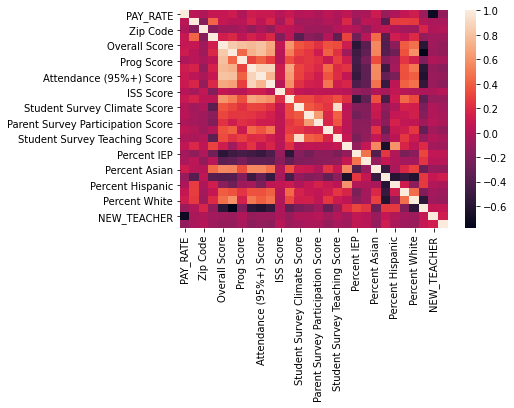

In [22]:
sns.heatmap(df_eda.corr());

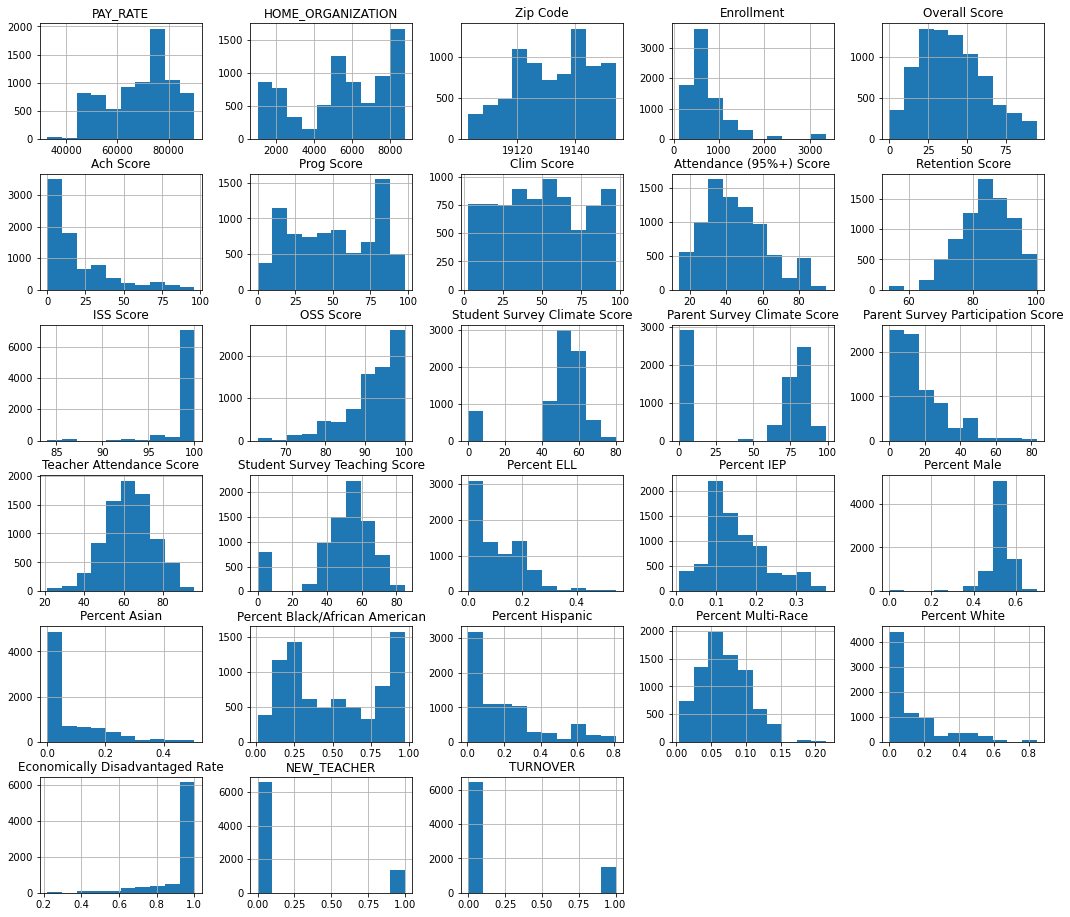

In [26]:
df_eda.hist(figsize=(18, 16));

### Preprocessing

In [27]:
df.head()

,LAST_NAME,FIRST_NAME,PAY_RATE,TITLE_DESCRIPTION,HOME_ORGANIZATION,ORGANIZATION_LEVEL,GENDER,School,Zip Code,Turnaround Model,...,Percent IEP,Percent Male,Percent Asian,Percent Black/African American,Percent Hispanic,Percent Multi-Race,Percent White,Economically Disadvantaged Rate,NEW_TEACHER,TURNOVER
0,ABAYOMI-IGE,OLABIMPE,90051,"TEACHER,SPEC EDUCATION",5070.0,HIGH SCHOOL,F,Parkway Northwest High School,19138.0,None,...,0.103846,0.488462,0.000000,0.934615,0.046154,0.007692,0.011538,0.824615,0,0
1,ABBOTT,JOYCE,76461,"TEACHER,FULL TIME",1290.0,ELEMENTARY SCHOOL,F,Andrew Hamilton School,19139.0,None,...,0.194757,0.558052,0.001873,0.893258,0.014981,0.069288,0.014981,1.000000,0,0
2,ABDUL-LATEEF,VILLIA,56531,"TEACHER,FULL TIME",1010.0,HIGH SCHOOL,F,John Bartram High School,19142.0,None,...,0.293805,0.576991,0.033628,0.915044,0.030088,0.015929,0.003540,1.000000,0,1
3,ABDULALEEM,MUHAMMAD,70564,"TEACHER,FULL TIME",6090.0,CAREER AND TECHNICAL HIGH SCHL,M,A. Philip Randolph Career and Technical High S...,19129.0,None,...,0.187879,0.634343,0.002020,0.905051,0.016162,0.040404,0.026263,1.000000,0,0
4,ABDULLAH,AARON,46694,"TEACHER,FULL TIME",6360.0,ELEMENTARY SCHOOL,M,Theodore Roosevelt School,19144.0,Turnaround,...,0.178161,0.522989,0.001916,0.919540,0.040230,0.028736,0.009579,1.000000,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7927 entries, 0 to 8251
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LAST_NAME                          7927 non-null   object 
 1   FIRST_NAME                         7927 non-null   object 
 2   PAY_RATE                           7927 non-null   int64  
 3   TITLE_DESCRIPTION                  7927 non-null   object 
 4   HOME_ORGANIZATION                  7927 non-null   float64
 5   ORGANIZATION_LEVEL                 7927 non-null   object 
 6   GENDER                             7927 non-null   object 
 7   School                             7927 non-null   object 
 8   Zip Code                           7927 non-null   float64
 9   Turnaround Model                   7927 non-null   object 
 10  Enrollment                         7927 non-null   float64
 11  Admissions Type                    7927 non-null   objec

In [29]:
drop_modeling = ['LAST_NAME', 'FIRST_NAME', 'HOME_ORGANIZATION', 'School', 'Overall Tier',
                 'Ach Tier', 'Prog Tier', 'Clim Tier', 'Attendance (95%+) Tier', 
                 'Retention Tier', 'ISS Tier', 'OSS Tier', 'Student Survey Climate Tier',
                 'Parent Survey Climate Tier', 'Parent Survey Participation Tier', 'TURNOVER']

In [30]:
X = df.drop(drop_modeling, axis=1)
y = df['TURNOVER']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
X_train.shape

(5945, 31)

There are some columns that are listed as objects when they should be numerical.

In [32]:
obj_to_num = ['Student Survey Climate Score', 'Student Survey Teaching Score', 
                  'Overall Score', 'Ach Score', 'Prog Score']

In [33]:
def na_transformer(df):
    '''
    Changes values to 0 for columns that have 
    'Not Applicable' or 'Insufficient Data' preventing them from becoming numerical.
    '''
    for col in obj_to_num:
        df.loc[(df[col] == 'Not Applicable'), col] = 0
        df.loc[(df[col] == 'Insufficient Data'), col] = 0
    return df

In [34]:
def to_float_transformer(df):
    '''
    Ensure all 'Score' columns are float, and all int64 are also float.
    '''
    for col in obj_to_num:
        df[col] = df[col].astype('float64')
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [35]:
cat_columns = ['TITLE_DESCRIPTION', 'ORGANIZATION_LEVEL', 'GENDER', 
               'Turnaround Model', 'Admissions Type', 'Zip Code']

# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                  [('ohe', OneHotEncoder(drop='first', sparse=False), 
                                    cat_columns)],
                                  remainder='passthrough')

# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('na_trans', FunctionTransformer(na_transformer)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('ohe_trans', ohe_col_trans)
])

In [36]:
X_train_clean = cleaning_pipeline.fit_transform(X_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-34-4e71e321aa9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('float64')
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [37]:
ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()

In [38]:
len(ohe_feature_names)

77

In [39]:
ohe_feature_names

['ohe__x0_TEACHER,SPEC EDUCATION',
 'ohe__x1_ELEMENTARY SCHOOL',
 'ohe__x1_HIGH SCHOOL',
 'ohe__x1_MIDDLE SCHOOL',
 'ohe__x2_M',
 'ohe__x3_School Redesign Initiative',
 'ohe__x3_Turnaround',
 'ohe__x4_Neighborhood',
 'ohe__x4_Special Admit',
 'ohe__x5_19104.0',
 'ohe__x5_19106.0',
 'ohe__x5_19111.0',
 'ohe__x5_19114.0',
 'ohe__x5_19115.0',
 'ohe__x5_19116.0',
 'ohe__x5_19118.0',
 'ohe__x5_19119.0',
 'ohe__x5_19120.0',
 'ohe__x5_19121.0',
 'ohe__x5_19122.0',
 'ohe__x5_19123.0',
 'ohe__x5_19124.0',
 'ohe__x5_19125.0',
 'ohe__x5_19126.0',
 'ohe__x5_19127.0',
 'ohe__x5_19128.0',
 'ohe__x5_19129.0',
 'ohe__x5_19130.0',
 'ohe__x5_19131.0',
 'ohe__x5_19132.0',
 'ohe__x5_19133.0',
 'ohe__x5_19134.0',
 'ohe__x5_19135.0',
 'ohe__x5_19136.0',
 'ohe__x5_19137.0',
 'ohe__x5_19138.0',
 'ohe__x5_19139.0',
 'ohe__x5_19140.0',
 'ohe__x5_19141.0',
 'ohe__x5_19142.0',
 'ohe__x5_19143.0',
 'ohe__x5_19144.0',
 'ohe__x5_19145.0',
 'ohe__x5_19146.0',
 'ohe__x5_19147.0',
 'ohe__x5_19148.0',
 'ohe__x5_19149.0'

### Modeling

Many models were created for this project. The `DummyClassifier` was used as baseline model. In order to improve on that baseline, we designed `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, and `XGBoost` models, with and without using SMOTE, to counteract class imbalances. 

For each model we will build a pipeline using `StandardScaler` and the model of choice. Then we will evaluate the model by running the pipeline through our print_cv_scores function and then gathering metrics for model efficacy.

Through the model iteration process we are seeking to maximize the recall score by minimizing the number of false negatives, meaning teachers who were predicted to stay and actually end up leaving. By focusing on recall, we are trying to reduce the chances of the model missing a teacher who actually leaves their school the following year.


In [40]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and binary target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','recall']
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Recall:', results['train_recall'].mean())
    print('Cross_Val Recall:', results['test_recall'].mean())


#### Dummy Classifier

In [41]:
dummy_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dc', DummyClassifier(strategy='most_frequent'))
])

In [42]:
print_cv_scores(dummy_pipe, X_train_clean, y_train)

[0.81055509 0.81055509 0.81055509 0.81055509 0.81076535]
Training Accuracy 0.8105971404541631
##############
[0.81076535 0.81076535 0.81076535 0.81076535 0.80992431]
Cross_Val Accuracy 0.8105971404541631
##############
Training Recall: 0.0
Cross_Val Recall: 0.0


In [43]:
dummy_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dc', DummyClassifier(strategy='stratified'))
])
dummy_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('dc', DummyClassifier(strategy='stratified'))])

In [44]:
print_cv_scores(dummy_pipe, X_train_clean, y_train)

[0.68881413 0.70016821 0.69238856 0.69175778 0.6745164 ]
Training Accuracy 0.6895290159798149
##############
[0.68881413 0.70227082 0.67619849 0.69890664 0.67283431]
Cross_Val Accuracy 0.6878048780487804
##############
Training Recall: 0.18872240720187444
Cross_Val Recall: 0.18296165191740416


In [47]:
dc_acc = 0.6878048780487804
dc_rec = 0.18296165191740416

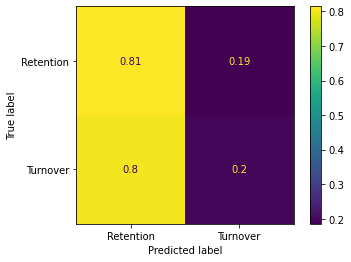

In [48]:
plot_confusion_matrix(dummy_pipe, 
                      X_train_clean, 
                      y_train, 
                      normalize = 'true',
                      display_labels= ['Retention', 'Turnover']);

The dummy classifier is having a difficult time predicting the actual turnover. 

#### Logistic Regression

Let's first perform a logistic regression with default hyperparameters.

In [49]:
lr_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe.fit(X_train_clean, y_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ss', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

In [50]:
print_cv_scores(lr_pipe, X_train_clean, y_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

[0.81097561 0.81076535 0.81307822 0.81118587 0.81139613]
Training Accuracy 0.8114802354920101
##############
[0.80992431 0.80992431 0.80656013 0.80992431 0.81244743]
Cross_Val Accuracy 0.8097560975609757
##############
Training Recall: 0.03263559008509064
Cross_Val Recall: 0.030198623402163227


/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


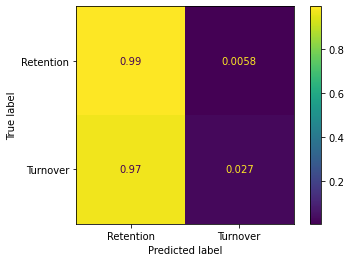

In [51]:
plot_confusion_matrix(lr_pipe, 
                      X_train_clean, 
                      y_train, 
                      normalize = 'true',
                      display_labels= ['Retention', 'Turnover']);

In a Logistic Regression model with default parameters, we can see that it has a really hard time classifying the minority class likely due to the class imbalance, so let's iterate this model to try to improve the recall scores.

In [52]:
lr_pipe1 = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',
                              random_state=42))
])
lr_pipe1.fit(X_train_clean, y_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ss', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [53]:
print_cv_scores(lr_pipe1, X_train_clean, y_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

[0.64045416 0.62952061 0.64108495 0.62867956 0.63015139]
Training Accuracy 0.6339781328847771
##############
[0.60807401 0.6156434  0.61059714 0.59966358 0.62068966]
Cross_Val Accuracy 0.6109335576114383
##############
Training Recall: 0.6263341965717104
Cross_Val Recall: 0.5683618485742379


/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

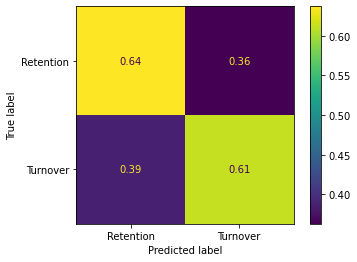

In [54]:
plot_confusion_matrix(lr_pipe1, 
                      X_train_clean, 
                      y_train, 
                      normalize = 'true',
                      display_labels= ['Retention', 'Turnover']);

By setting the `class_weight` hyperparameter to balanced, this helps for the logistic regression model to better classify the minority class and the recall score increases by over 50%.

Let's set up a grid search to find the best hyperparameters to maximize the recall score.

In [55]:
lr_grid_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',
                              random_state=42))
])

grid = {'lr__tol': [1e-5,1e-4,1e-3],
        'lr__C' : [1e-5,1e-3,1e-1, 1, 100],
        'lr__max_iter':[1e3, 1e5]
       }

In [56]:
gridsearch = GridSearchCV(lr_grid_pipe, 
                          grid, 
                          return_train_score=True, 
                          scoring='recall')

gridsearch.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'lr__C': [1e-05, 0.001, 0.1, 1, 100],
                         'lr__max_iter': [1000.0, 100000.0],
                         'lr__tol': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='recall')

In [57]:
gridsearch.best_params_

{'lr__C': 1e-05, 'lr__max_iter': 1000.0, 'lr__tol': 1e-05}

From these results, it seems that the logistic regression model likes higher regularization with the smallest C performing best, as well as the smallest tolerance. Let's run it again with different penalty types and some smaller C and tolerance levels.

In [58]:
lr_grid_pipe1 = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',
                              max_iter = 1000,
                              solver = 'liblinear',
                              random_state=42))
])

grid1 = {'lr__tol': [1e-7, 1e-6, 1e-5],
        'lr__C' : [1e-7, 1e-6, 1e-5],
        'lr__penalty':['l1', 'l2']
        }

In [59]:
gridsearch1 = GridSearchCV(lr_grid_pipe1, 
                          grid1, 
                          return_train_score=True, 
                          scoring='recall')

gridsearch1.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'lr__C': [1e-07, 1e-06, 1e-05],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__tol': [1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='recall')

In [60]:
gridsearch1.best_params_

{'lr__C': 1e-06, 'lr__penalty': 'l2', 'lr__tol': 1e-07}

Higher regularization strength and lower tolerance allows this logistic regression model to perform the best.

It looks like the l2 penalty continues to perform the best, let's just check to see the scores using different solvers.

In [61]:
lr_grid_pipe2 = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',
                              max_iter = 1000,
                              C = 1e-06,
                              tol = 1e-07,
                              random_state=42))
])
grid2 = {'lr__solver': ['liblinear', 'lbfgs']}

In [62]:
gridsearch2 = GridSearchCV(lr_grid_pipe2, 
                          grid2, 
                          return_train_score=True, 
                          scoring='recall')

gridsearch2.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(C=1e-06,
                                                           class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           tol=1e-07))]),
             param_grid={'lr__solver': ['liblinear', 'lbfgs']},
             return_train_score=True, scoring='recall')

In [63]:
gridsearch2.best_params_

{'lr__solver': 'liblinear'}

In [64]:
gridsearch2.best_score_

0.6882831858407079

##### Best Logistic Regression Model

In [65]:
best_lr = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',
                              solver = 'liblinear',
                              C = 1e-06,
                              tol = 1e-07,
                              max_iter=1000,
                              random_state=42))
])
best_lr.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr',
                 LogisticRegression(C=1e-06, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear', tol=1e-07))])

In [66]:
print_cv_scores(best_lr, X_train_clean, y_train)

[0.55256518 0.55761144 0.55403701 0.55109336 0.55109336]
Training Accuracy 0.5532800672834315
##############
[0.54415475 0.54499579 0.56013457 0.52985702 0.56686291]
Cross_Val Accuracy 0.5492010092514719
##############
Training Recall: 0.696270070292268
Cross_Val Recall: 0.6882831858407079


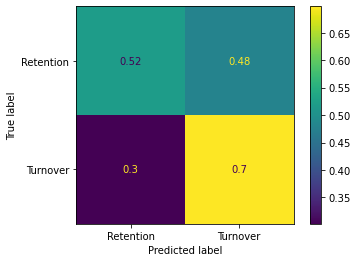

In [67]:
plot_confusion_matrix(best_lr, 
                      X_train_clean, 
                      y_train, 
                      normalize='true',
                      display_labels= ['Retention', 'Turnover']);

__PCA with Logistic Regression__

In [150]:
lr_PCA = Pipeline(steps=[('ss', StandardScaler()),
                         ('pca', PCA()),
                         ('lr', LogisticRegression(class_weight='balanced',
                                                   solver = 'liblinear',
                                                   C = 1e-06,
                                                   tol = 1e-07,
                                                   max_iter=1000,
                                                   random_state=42))
])

pca_grid = {'pca__n_components': [0.1, 0.2, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]}

In [151]:
pca_gridsearch = GridSearchCV(lr_PCA, 
                              pca_grid, 
                              return_train_score=True, 
                              scoring='recall')

pca_gridsearch.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('lr',
                                        LogisticRegression(C=1e-06,
                                                           class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear',
                                                           tol=1e-07))]),
             param_grid={'pca__n_components': [0.1, 0.2, 0.5, 0.7, 0.75, 0.8,
                                               0.85, 0.9, 0.95]},
             return_train_score=True, scoring='recall')

In [152]:
pca_gridsearch.best_params_

{'pca__n_components': 0.8}

In [153]:
pca_gridsearch.best_score_

0.6980609636184858

In [155]:
pca_gridsearch.best_estimator_[1].n_components_

39

The PCA that kept 80% of the variance of the model is the one that performs the best. Using Principal Component Analysis, the Logistic Regression model performed about 1% better on recall than without PCA. 

#### Best Logistic Regression with PCA

In [196]:
lr_PCA = Pipeline(steps=[('ss', StandardScaler()),
                         ('pca', PCA(n_components=0.8)),
                         ('lr', LogisticRegression(class_weight='balanced',
                                                   solver = 'liblinear',
                                                   C = 1e-07,
                                                   tol = 1e-07,
                                                   max_iter=1000,
                                                   random_state=42))
])

lr_PCA.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=0.8)),
                ('lr',
                 LogisticRegression(C=1e-07, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear', tol=1e-07))])

In [197]:
print_cv_scores(lr_PCA, X_train_clean, y_train)

[0.54857023 0.55529857 0.55067283 0.54730866 0.54667788]
Training Accuracy 0.5497056349873843
##############
[0.54079058 0.54667788 0.55845248 0.53322119 0.55929352]
Cross_Val Accuracy 0.5476871320437342
##############
Training Recall: 0.6991559995067209
Cross_Val Recall: 0.6962871189773845


In [198]:
lr_acc = 0.5476871320437342
lr_rec = 0.6962871189773845

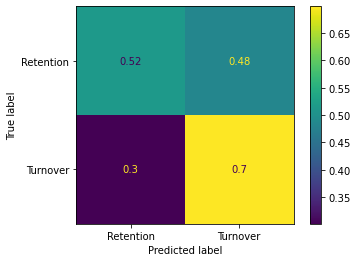

In [199]:
plot_confusion_matrix(lr_PCA, 
                      X_train_clean, 
                      y_train, 
                      normalize='true',
                      display_labels= ['Retention', 'Turnover']);

In [200]:
len(ohe_feature_names)

77

In [201]:
lr_PCA[1].n_components_

39

In [202]:
lr_PCA[1].explained_variance_ratio_

array([0.11405829, 0.05828288, 0.04870678, 0.03241171, 0.02890407,
       0.02510801, 0.02332368, 0.02232165, 0.01987881, 0.01952622,
       0.01858635, 0.01705375, 0.01636431, 0.01575433, 0.01564298,
       0.01545155, 0.01519688, 0.01479706, 0.01457451, 0.01431715,
       0.01395437, 0.01395201, 0.01374047, 0.013551  , 0.01352098,
       0.01349132, 0.01343007, 0.01336903, 0.01332781, 0.01332001,
       0.01331564, 0.01329995, 0.01327519, 0.01326033, 0.01324003,
       0.01321464, 0.01320674, 0.01317944, 0.01316477])

In [203]:
def create_importance_dataframe(pca):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = ohe_feature_names

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df


In [204]:
importance_df=create_importance_dataframe(lr_PCA[1])
display(importance_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
"ohe__x0_TEACHER,SPEC EDUCATION",0.029606,0.001615,0.000503,0.017213,0.143520,0.002570,0.005794,0.122205,0.061482,0.032753,...,0.086494,0.023853,0.014110,0.000239,0.033176,0.019649,0.007527,0.026249,0.041651,0.036283
ohe__x1_ELEMENTARY SCHOOL,0.004865,0.362659,0.163322,0.211459,0.083530,0.120961,0.018410,0.087504,0.120130,0.091444,...,0.007659,0.001067,0.001947,0.007139,0.000667,0.002076,0.023845,0.007887,0.001172,0.014728
ohe__x1_HIGH SCHOOL,0.004687,0.363214,0.122668,0.171493,0.027888,0.115611,0.130560,0.005111,0.169761,0.010935,...,0.003343,0.008236,0.023552,0.004799,0.001394,0.005997,0.006743,0.007526,0.000067,0.000477
ohe__x1_MIDDLE SCHOOL,0.012827,0.017275,0.093393,0.002824,0.073193,0.057934,0.178130,0.205138,0.490578,0.155410,...,0.000745,0.005292,0.010736,0.006470,0.011719,0.015149,0.009600,0.002702,0.001089,0.003537
ohe__x2_M,0.000935,0.150581,0.053592,0.101927,0.000604,0.074113,0.014739,0.040349,0.000620,0.013176,...,0.020662,0.000135,0.024299,0.009403,0.010517,0.005311,0.045481,0.025352,0.004084,0.027194


In [205]:
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are')
display(pc1_top_10_features)


PC1 top 10 features are


Clim Score                         0.306016
Overall Score                      0.303483
Attendance (95%+) Score            0.296413
Ach Score                          0.293234
Retention Score                    0.283305
OSS Score                          0.246988
Economically Disadvantaged Rate    0.226529
Percent Asian                      0.213329
Percent IEP                        0.208463
Percent White                      0.197804
Name: PC1, dtype: float64

In [195]:
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are')
display(pc2_top_10_features)


PC2 top 10 features are


ohe__x1_HIGH SCHOOL                  0.363207
ohe__x1_ELEMENTARY SCHOOL            0.362654
ohe__x4_Neighborhood                 0.331782
ohe__x4_Special Admit                0.319042
Student Survey Teaching Score        0.259789
Percent ELL                          0.207613
Percent Multi-Race                   0.203065
Percent Hispanic                     0.197211
Parent Survey Participation Score    0.184256
Percent Black/African American       0.180343
Name: PC2, dtype: float64

#### K-Neighbors Classification

In [82]:
knn_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('knn', KNeighborsClassifier())])

In [83]:
print_cv_scores(knn_pipe, X_train_clean, y_train)

[0.82884777 0.83410429 0.83746846 0.83368377 0.82926829]
Training Accuracy 0.8326745164003364
##############
[0.78805719 0.78973928 0.78469302 0.78216989 0.79310345]
Cross_Val Accuracy 0.7875525651808243
##############
Training Recall: 0.23956098162535455
Cross_Val Recall: 0.10656440511307767


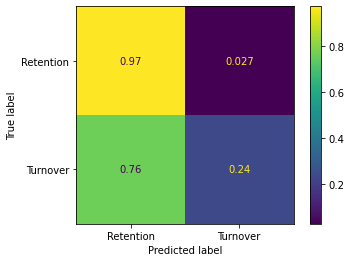

In [84]:
plot_confusion_matrix(knn_pipe, 
                      X_train_clean, 
                      y_train, 
                      normalize='true',
                      display_labels= ['Retention', 'Turnover']);

The k-nearest neighbors classifier is doing well to predict retention, but struggles to identify teachers who are leaving, which is the main focus of this project. Let's see if we can improve the performance of the model by trying out different hyperparameters like the number of neighbors and the distance metric.

In [ ]:
# knn_pipe = Pipeline(steps=[
#     ('ss', StandardScaler()),
#     ('knn', KNeighborsClassifier())
# ])

# knn_grid = {'knn__n_neighbors': [3, 5, 7],
#             'knn__p': [1, 2, 3]}

# knn_gridsearch = GridSearchCV(knn_pipe, 
#                               knn_grid, 
#                               return_train_score=True, 
#                               scoring='recall')

# knn_gridsearch.fit(X_train_clean, y_train)

In [ ]:
# knn_gridsearch.best_params_

The grid search performed above has been commented out to save runtime when rerunning this notebook, however, the best parameters are used in the below knn pipeline.

In [136]:
knn_pipe_best = imbpipe(steps=[('ss', StandardScaler()),
                               ('sm', SMOTE()),
                               ('knn', KNeighborsClassifier(n_neighbors=3, p=2))
])

knn_pipe_best.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('sm', SMOTE()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [137]:
print_cv_scores(knn_pipe_best, X_train_clean, y_train)

[0.84629941 0.85176619 0.85723297 0.85470984 0.84924306]
Training Accuracy 0.8518502943650127
##############
[0.686291   0.69974769 0.66778806 0.68713204 0.67872161]
Cross_Val Accuracy 0.6839360807401178
##############
Training Recall: 0.7084834134911826
Cross_Val Recall: 0.3321297935103245


In [138]:
knn_acc = 0.6839360807401178
knn_rec = 0.3321297935103245

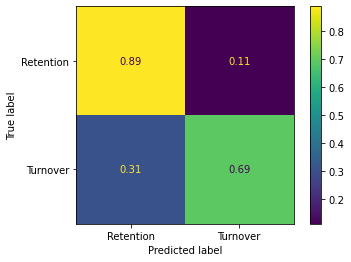

In [139]:
plot_confusion_matrix(knn_pipe_best, 
                      X_train_clean, 
                      y_train, 
                      normalize='true',
                      display_labels= ['Retention', 'Turnover']);

Based on the performance of the K-Nearest Neighbors Classifier, with only 33% recall, I don't think it's wise to explore this classifier any further.

#### Decision Tree

In [89]:
dtc_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA(n_components=0.8)),
    ('dtc', DecisionTreeClassifier(class_weight='balanced'))
])
dtc_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=0.8)),
                ('dtc', DecisionTreeClassifier(class_weight='balanced'))])

In [90]:
dtc_pipe[-1].get_depth()

36

In [91]:
print_cv_scores(dtc_pipe, X_train_clean, y_train)

[0.90117746 0.90117746 0.90306981 0.90517241 0.90412111]
Training Accuracy 0.9029436501261564
##############
[0.66021867 0.66778806 0.67031119 0.65601346 0.6804037 ]
Cross_Val Accuracy 0.6669470142977293
##############
Training Recall: 0.9777972623011468
Cross_Val Recall: 0.2983834808259587


With default hyperparameters, it's clear that the decision tree is overfitting. Let's prune the tree using GridSearchCV

In [92]:
dtc_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('dtc', DecisionTreeClassifier(class_weight='balanced', 
                                   random_state=42))
])

In [93]:
dtc_grid = {'pca__n_components': [0.75, 0.8, 0.85, 0.9],
            'dtc__max_depth': [5, 6, 7],
            'dtc__min_samples_leaf': [1, 2, 3],
            'dtc__max_features': ['auto', 'sqrt', 'log2']}

In [94]:
dtc_gridsearch = GridSearchCV(dtc_pipe, 
                              dtc_grid, 
                              scoring='recall')

dtc_gridsearch.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('dtc',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             param_grid={'dtc__max_depth': [5, 6, 7, 8],
                         'dtc__max_features': ['auto', 'sqrt', 'log2'],
                         'dtc__min_samples_leaf': [1, 2, 3],
                         'pca__n_components': [0.75, 0.8, 0.85, 0.9]},
             scoring='recall')

In [95]:
dtc_gridsearch.best_params_

{'dtc__max_depth': 5,
 'dtc__max_features': 'log2',
 'dtc__min_samples_leaf': 2,
 'pca__n_components': 0.8}

In [96]:
print_cv_scores(dtc_gridsearch.best_estimator_, X_train_clean, y_train)

[0.504836   0.58326325 0.66042893 0.51198486 0.48780488]
Training Accuracy 0.549663582842725
##############
[0.45584525 0.55929352 0.63414634 0.48864592 0.48107653]
Cross_Val Accuracy 0.5238015138772077
##############
Training Recall: 0.7262658774201505
Cross_Val Recall: 0.6508790560471975


In [97]:
dtc_acc = 0.5238015138772077
dtc_rec = 0.6508790560471975

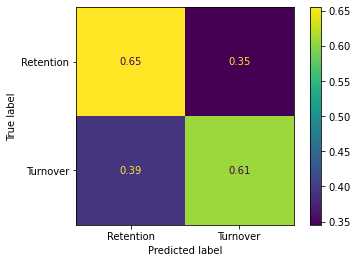

In [98]:
dtc_gridsearch.best_estimator_.fit(X_train_clean, y_train)
plot_confusion_matrix(dtc_gridsearch.best_estimator_, 
                      X_train_clean, 
                      y_train,
                      normalize = 'true',
                      display_labels= ['Retention', 'Turnover']);

In [99]:
dtc_gridsearch.best_estimator_[-1].feature_importances_

array([ 2.60078312e-01,  9.73720484e-02,  1.55234682e-01,  3.94634299e-02,
        9.58669002e-02,  2.07937856e-02,  5.32360037e-03,  5.08775254e-02,
        2.18712825e-02,  7.82476855e-04,  0.00000000e+00,  0.00000000e+00,
        1.48990853e-02,  1.03300859e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.42256028e-02,  0.00000000e+00,  3.09868525e-02,
        6.18151551e-02,  7.25946673e-02,  0.00000000e+00,  0.00000000e+00,
        1.95701742e-02,  0.00000000e+00,  2.74723335e-03,  0.00000000e+00,
        1.72103021e-02,  0.00000000e+00,  0.00000000e+00,  7.95679837e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.46008545e-18,  0.00000000e+00,  0.00000000e+00])

In [100]:
dtc_gridsearch.best_estimator_[-1].n_features_in_

39

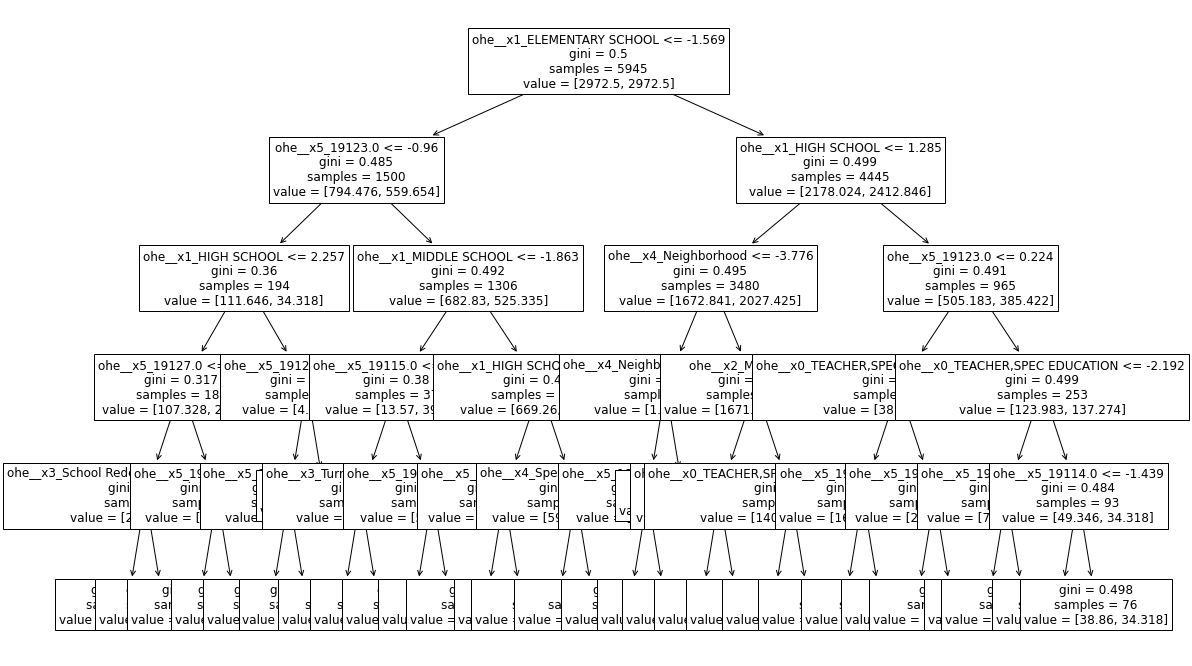

In [102]:
plt.figure(figsize=(18,12)) 
plot_tree(dtc_gridsearch.best_estimator_[-1], 
          feature_names=ohe_feature_names, 
          fontsize=12)
plt.show()

Pruning has helped to make the decision tree model less overfit and perform better on the recall during cross validation. Let's try a random forest model to see if scores will imporve further.

#### Random Forest

In [103]:
rf_pipe = Pipeline(steps=[('ss', StandardScaler()),
                          ('pca', PCA()),
                          ('rf', RandomForestClassifier())])
rf_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                ('rf', RandomForestClassifier())])

In [104]:
print_cv_scores(rf_pipe, X_train_clean, y_train)

[0.93608074 0.936291   0.93902439 0.93797309 0.93860387]
Training Accuracy 0.9375946173254835
##############
[0.75357443 0.76534903 0.74179983 0.74600505 0.75357443]
Cross_Val Accuracy 0.7520605550883095
##############
Training Recall: 0.7329061536564312
Cross_Val Recall: 0.1865093411996067


In [107]:
rf_pipe = Pipeline(steps=[('ss', StandardScaler()),
                          ('pca', PCA()),
                          ('rf', RandomForestClassifier(class_weight='balanced',
                                                        n_jobs = -1,
                                                        random_state=42))])

rf_grid = {'rf__n_estimators': [50, 100],
           'rf__max_depth': [5, 10, 15],
           'rf__min_samples_leaf': [1, 2],
           'rf__max_features': ['sqrt', 'log2'],
           'pca__n_components': [0.75, 0.8, 0.9]}

In [108]:
rf_gridsearch = GridSearchCV(rf_pipe, 
                             rf_grid, 
                             scoring='recall')

rf_gridsearch.fit(X_train_clean, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'pca__n_components': [0.75, 0.8, 0.9],
                         'rf__max_depth': [5, 10, 15],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__n_estimators': [50, 100]},
             scoring='recall')

In [109]:
rf_gridsearch.best_params_

{'pca__n_components': 0.9,
 'rf__max_depth': 5,
 'rf__max_features': 'sqrt',
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 50}

In [110]:
rf_gridsearch.best_score_

0.5132940019665683

In [111]:
print_cv_scores(rf_gridsearch.best_estimator_, X_train_clean, y_train)

[0.70836838 0.70374264 0.7195122  0.70584525 0.68902439]
Training Accuracy 0.7052985702270816
##############
[0.6568545  0.66021867 0.64003364 0.63835156 0.66190076]
Cross_Val Accuracy 0.6514718250630782
##############
Training Recall: 0.6625238623751387
Cross_Val Recall: 0.5132940019665683


In [112]:
rf_acc = 0.6514718250630782
rf_rec = 0.5132940019665683

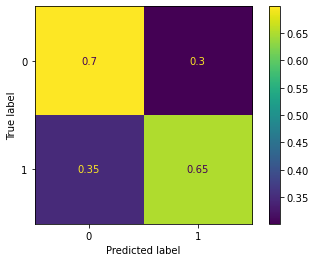

In [113]:
rf_gridsearch.best_estimator_.fit(X_train_clean, y_train)
plot_confusion_matrix(rf_gridsearch.best_estimator_, 
                      X_train_clean, 
                      y_train,
                      normalize = 'true');

#### XGBoost

In [114]:
xgb_pipe = Pipeline(steps=[('ss', StandardScaler()),
                           ('pca', PCA(n_components=0.9)),
                           ('xgb', XGBClassifier(objective ='binary:logistic', 
                                                 colsample_bytree = 0.2, 
                                                 learning_rate = 0.3,
                                                 max_depth = 6, 
                                                 alpha = 10, 
                                                 n_estimators = 1000))])
xgb_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('xgb',
                 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.2, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [115]:
print_cv_scores(xgb_pipe, X_train_clean, y_train)

[0.83767872 0.83557611 0.84125315 0.83809924 0.83788898]
Training Accuracy 0.8380992430613962
##############
[0.79730866 0.80151388 0.78973928 0.80656013 0.80740118]
Cross_Val Accuracy 0.8005046257359126
##############
Training Recall: 0.18228092243186583
Cross_Val Recall: 0.0648220255653884


In [133]:
xgb_pipe_smote = imbpipe(steps=[('ss', StandardScaler()),
                                ('sm', SMOTE(random_state=42)),
                                ('xgb', XGBClassifier(objective ='binary:logistic', 
                                                      colsample_bytree = 0.3, 
                                                      learning_rate = 0.1,
                                                      max_depth = 6, 
                                                      alpha = 10, 
                                                      n_estimators = 50))])
xgb_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('xgb',
                 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.2, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [134]:
print_cv_scores(xgb_pipe_smote, X_train_clean, y_train)

[0.79100084 0.7901598  0.79478553 0.78553406 0.78826745]
Training Accuracy 0.7899495374264088
##############
[0.74011775 0.75946173 0.745164   0.73675357 0.77207738]
Cross_Val Accuracy 0.7507148864592094
##############
Training Recall: 0.3694453076828216
Cross_Val Recall: 0.26287905604719763


In [135]:
xgb_acc = 0.7507148864592094
xgb_rec = 0.26287905604719763

__Identifying Best Performing Model__

In [142]:
X_labels = ['Dummy''\n''Classification',
            'Logistic''\n''Regression', 
            'KNN',
            'Decision''\n''Tree',
            'Random''\n''Forest',  
            'XGBoost']

y1 = [dc_acc, lr_acc, knn_acc, dtc_acc, rf_acc, xgb_acc]
y2 = [dc_rec, lr_rec, knn_rec, dtc_rec, rf_rec, xgb_rec]

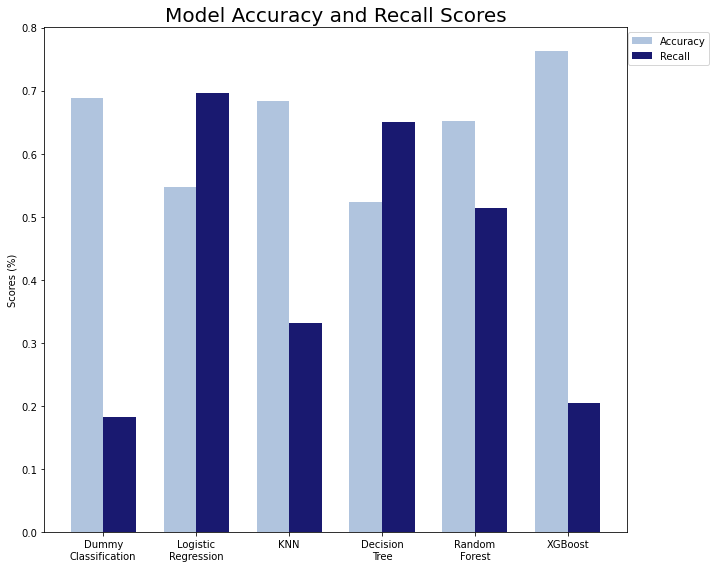

In [143]:
width = 0.35  # the width of the bars
x = np.arange(len(X_labels))
fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - width/2, y1, width, label='Accuracy', color='lightsteelblue')
rects2 = ax.bar(x + width/2, y2, width, label='Recall', color='midnightblue')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Model Accuracy and Recall Scores', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(X_labels)
ax.legend(bbox_to_anchor=(1.15, 1))

fig.tight_layout()
#set background color to white
fig.patch.set_facecolor('white')
plt.show()
#save the figure in the images folder
#fig.savefig('images/Model_Scores.png')

### Evaluation